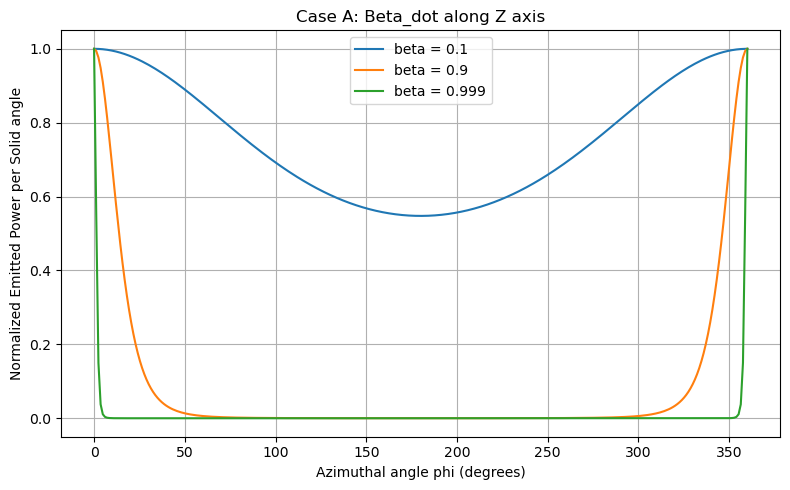

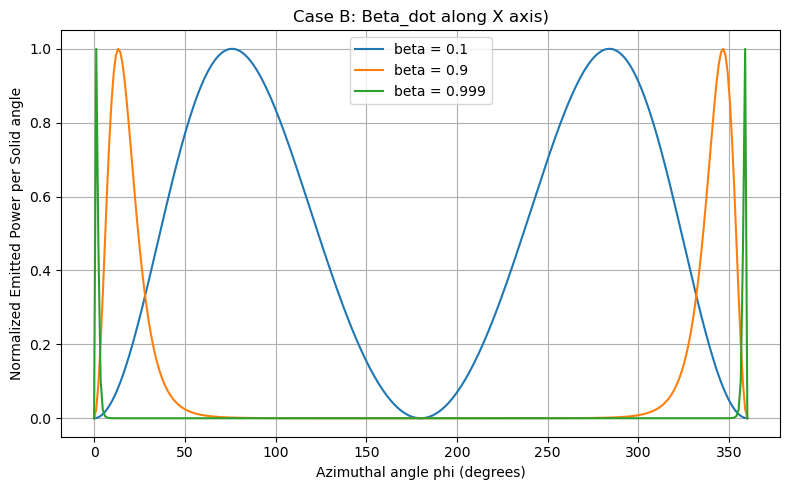

In [11]:
import numpy as np
import matplotlib.pyplot as plt

q=c=1     
bdotz= 0.3  
bdotx= 0.9  
betas=[0.1, 0.9, 0.999]  
phi=np.linspace(0, 2 * np.pi, 300)
theta=np.pi / 2 * np.ones_like(phi)  #  to make array of 1's * pi/2 of same size as phi

def nhat(theta, phi):
    x=np.sin(theta) * np.cos(phi)
    y=np.sin(theta) * np.sin(phi)
    z=np.cos(theta)
    return np.column_stack((x, y, z)) # will put say all nx cap elemts for different phi in column one ,same for ny,nz

ncap=nhat(theta, phi)

def dpdomega(ncap, b, bdot):
    cp1 = np.cross(ncap - b, bdot)
    cp2 = np.cross(ncap, cp1)
    num = np.sum(cp2**2, axis=-1)
    nb = np.sum(ncap * b, axis=-1)
    denom = (1 - nb)**5
    dpdom = (q**2 / (4 * np.pi * c)) * num /denom
    return dpdom


#case a 
plt.figure(figsize=(8,5))
for i in betas:
    b=np.array([i, 0, 0])
    bdot=np.array([0, 0, bdotz])
    dpdom=dpdomega(ncap, b, bdot)
    dpdom=dpdom / np.max(dpdom)  # normalize for clarity
    plt.plot(np.degrees(phi), dpdom, label=f'beta = {i}')

plt.title('Case A: Beta_dot along Z axis')
plt.xlabel('Azimuthal angle phi (degrees)')
plt.ylabel('Normalized Emitted Power per Solid angle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#caseb
plt.figure(figsize=(8,5))
for i in betas:
    b=np.array([i, 0, 0])
    bdot=np.array([bdotx, 0, 0])
    dpdom=dpdomega(ncap, b, bdot)
    dpdom=dpdom / np.max(dpdom)
    plt.plot(np.degrees(phi), dpdom, label=f'beta = {i}')

plt.title('Case B: Beta_dot along X axis)')
plt.xlabel('Azimuthal angle phi (degrees)')
plt.ylabel('Normalized Emitted Power per Solid angle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
